In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import random
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [2]:
#data1=pd.read_csv("2020/survey_results_public.csv")
#data1

In [4]:
plat=pd.read_csv(r"处理后技术数据\plats.csv")
plat.dropna(axis=0,subset=["PlatformWorkedWith"],inplace=True)
plat=plat.iloc[:,2:]
plat=plat.sample(n=10000,random_state=123,axis=0)
plat

,Windows,iOS,AWS,Docker,Linux,MacOS,Android,WordPress,Raspberry Pi,Heroku,Google Cloud Platform,Kubernetes,Arduino,Slack Apps and Integrations,Microsoft Azure,IBM Cloud or Watson
29051,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
47088,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3622,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
51345,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
10316,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30063,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
59698,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0
9087,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
48722,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0


In [5]:
import re
from sklearn.manifold import TSNE
from scipy.cluster.vq import vq, kmeans, whiten

features=plat
# 白化处理
whitened = whiten(features)

100%|██████████| 18/18 [00:04<00:00,  3.67it/s]


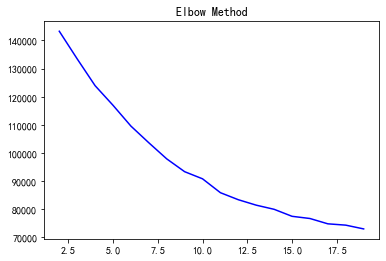

In [6]:
# 肘部法则的可视化
from sklearn.cluster import KMeans
elbow=[]
X=whitened
for i in tqdm(range(2,20)): # 创建遍历，找到最合适的k值
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=101)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)
# 通过画图找出最合适的K值
import seaborn as sns
sns.lineplot(range(2,20),elbow,color='blue')
plt.rcParams.update({'figure.figsize':(16,10),'figure.dpi':100})
plt.title('Elbow Method')
plt.show()

In [7]:
# from sklearn import metrics
# # 创建遍历，找到最合适的k值
# scores = []
# for k in tqdm(range(2,40)):
#     labels = KMeans(n_clusters=k).fit(X).labels_
#     score = metrics.silhouette_score(X,labels)
#     scores.append(score)
# # 通过画图找出最合适的K值
# plt.plot(list(range(2,40)),scores)
# plt.xlabel('Number of Clusters Initialized')
# plt.ylabel('Sihouette Score')
# plt.show()

In [8]:
import re
from sklearn.manifold import TSNE
from scipy.cluster.vq import vq, kmeans, whiten

#k-means聚类
codebook, distortion = kmeans(whitened, 9)# 返回聚类中心点和每个类的平均误差
#返回每行数据聚类的编号及偏差
codes, error = vq(whitened, codebook)
#将聚类结果形成dataframe
df=pd.DataFrame(features)
df['code']=codes

      Windows  iOS  AWS  Docker  Linux  MacOS  Android  WordPress  \
0           1    0    0       0      0      0        0          0   
1           1    0    0       0      0      0        0          0   
2           0    1    0       0      0      0        1          0   
3           0    0    0       1      0      1        0          0   
4           1    0    0       1      0      0        0          0   
...       ...  ...  ...     ...    ...    ...      ...        ...   
9995        1    0    0       0      0      0        0          1   
9996        0    0    1       1      1      1        0          0   
9997        1    0    0       0      1      0        0          0   
9998        0    0    0       0      1      1        0          0   
9999        1    0    0       0      0      0        1          0   

      Raspberry Pi  Heroku  Google Cloud Platform  Kubernetes  Arduino  \
0                0       0                      0           0        0   
1                0     

  1%|          | 73/10000 [00:00<00:13, 726.44it/s]

              0          1
0    -60.086739   1.077141
1    -18.394741  43.995316
2    -20.913145  -6.948675
3     24.274260 -27.902454
4    -24.346537   7.413783
...         ...        ...
9995 -18.939196  33.616890
9996  48.781879   9.558199
9997 -40.243439  49.938892
9998   6.006265  -8.980089
9999 -21.071493  25.263605

[10000 rows x 2 columns]


100%|██████████| 10000/10000 [01:42<00:00, 97.77it/s]


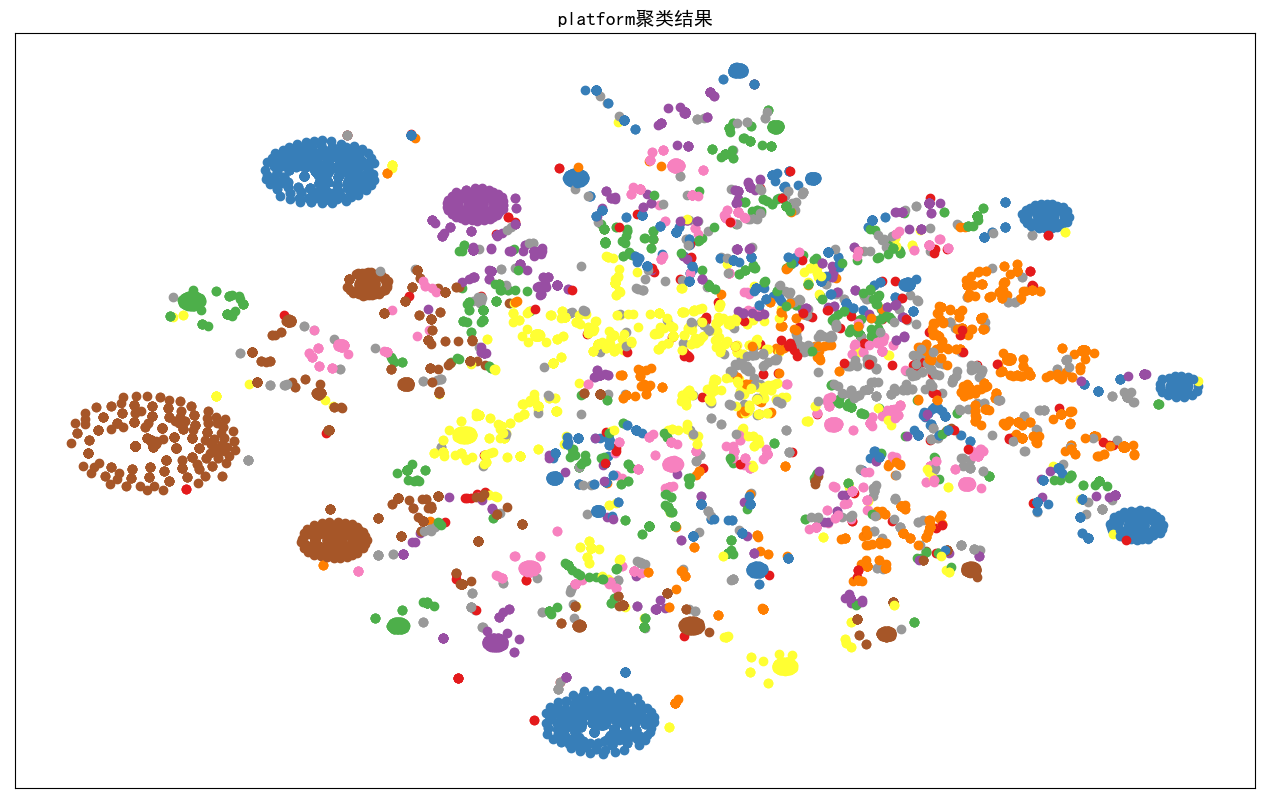

In [9]:
df=df.reset_index(drop=True)
print(df)
def plot_embedding(images, label):
    x_min, x_max = np.min(images, 0), np.max(images, 0)
    images = (images - x_min) / (x_max - x_min)   # 归一化处理
    fig = plt.figure()  # 建图
    for i in tqdm(range(len(images))):  # 遍历所有样本
        plt.scatter(images[i, 0], images[i, 1],c= np.array(plt.cm.Set1(label[i])).reshape(1,-1))
    plt.xticks([])
    plt.yticks([])
    plt.title("platform聚类结果", fontsize = 14)  # 标题
    plt.show()

# 降为二维后实现可视化
def Paint(images, labels):
    tsne = TSNE(n_components = 2, init = 'pca', random_state = 0)  # 利用TSNE降维
    result = tsne.fit_transform(images)
    print(pd.DataFrame(result))
    # 画图
    plot_embedding(result, labels)
    
Paint(df.iloc[:,:-1],df["code"])